In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import anndata as ad
import matplotlib.pyplot as plt
import moscot as mt
import mplscience
import numpy as np
import pandas
import scanpy as sc
import squidpy as sq
import seaborn as sns
import pandas as pd
from ott.solvers.linear import acceleration
import mplscience
mplscience.set_style()
# from jax import config
# config.update("jax_enable_x64", True)
%load_ext autoreload
%autoreload 2
mplscience.set_style()
plt.rcParams["legend.scatterpoints"] = 1

In [3]:
adata1 = ad.read_h5ad(
    "/lustre/groups/ml01/workspace/moscot_paper/alignment/E14-16h_a_count_normal_stereoseq.h5ad"
)
adata2 = ad.read_h5ad(
    "/lustre/groups/ml01/workspace/moscot_paper/alignment/E16-18h_a_count_normal_stereoseq.h5ad"
)
print(adata1.X.max(), adata2.X.max())
print(adata1.layers["raw_counts"].sum(), adata2.layers["raw_counts"].sum())
# ['0', '1', '2', '3', '4', '5', '6', '7']
# adata = adata[adata.obs.synth_batch == str(dataset["batch"])].copy()
# adata.X = rng.normal(size=adata.X.shape) + adata.X.copy()

7.0361485 5.212772
35190190.0 22735988.0


In [80]:
# get colors
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Access the Set3 colormap
set3 = plt.get_cmap('Set3')

# Generate 11 equally spaced intervals within the colormap
colors = set3(range(11))

# Convert each color from RGBA to hex format
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# get keys
categories = set(adata1.obs["annotation"].cat.categories).union(set(adata2.obs["annotation"].cat.categories))
colors = {k:v for k,v in zip(categories, hex_colors)}

# for some reason matplotlib colormaps are different in every session so setting this here
colors = {'hemolymph': '#d9d9d9',
 'amnioserosa': '#ffffb3',
 'CNS': '#bebada',
 'salivary gland': '#fb8072',
 'foregut': '#80b1d3',
 'trachea': '#fdb462',
 'epidermis': '#b3de69',
 'midgut': '#fccde5',
 'muscle': '#8dd3c7',
 'fat body': '#bc80bd',
 'carcass': '#ccebc5'}

# add colors to anndata
adata1.uns["annotation_colors"] = [colors[i] for i in adata1.obs.annotation.cat.categories]
adata2.uns["annotation_colors"] = [colors[i] for i in adata2.obs.annotation.cat.categories]

sc.pp.highly_variable_genes(adata1, n_top_genes=8000)
sc.pp.highly_variable_genes(adata2, n_top_genes=8000)


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


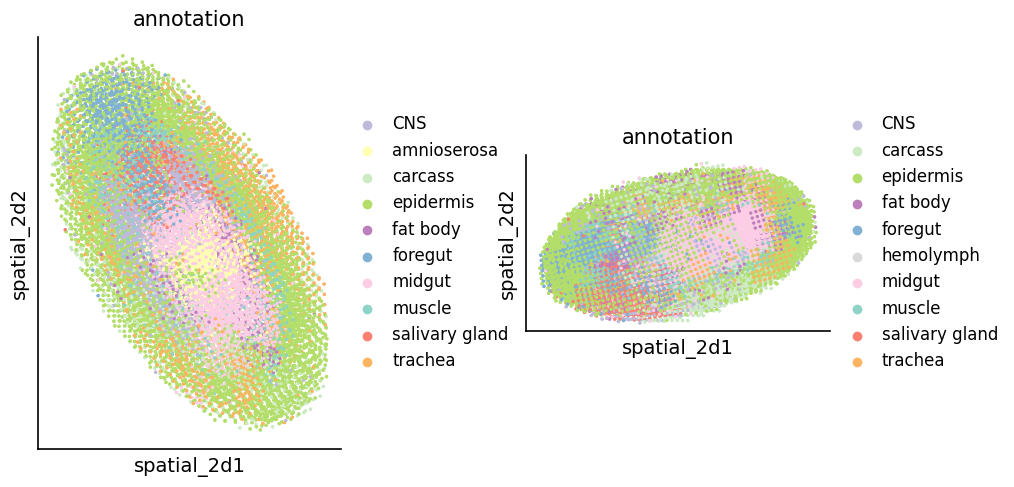

In [81]:
adata1.obsm["spatial_2d"] = adata1.obsm["spatial"][:, [0, 1]]
adata2.obsm["spatial_2d"] = adata2.obsm["spatial"][:, [0, 1]]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sq.pl.spatial_scatter(
    adata1, color="annotation", spatial_key="spatial_2d", shape=None, ax=ax[0]
)
sq.pl.spatial_scatter(
    adata2, color="annotation", spatial_key="spatial_2d", shape=None, ax=ax[1]
)
plt.tight_layout()

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:327: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:327: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


Text(0.5, 0, 'z')

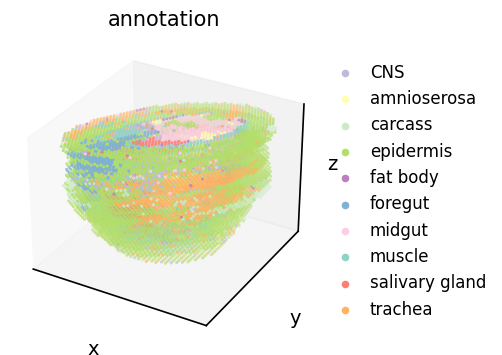

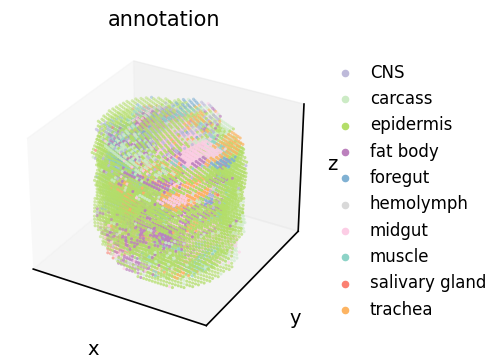

In [140]:
ax = sc.pl.embedding(
    adata1,
    basis="spatial",
    projection="3d",
    color="annotation",
    hspace=5,
    show = False
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax = sc.pl.embedding(
    adata2,
    basis="spatial",
    projection="3d",
    color="annotation",
    hspace=5,
    show = False
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [7]:
# sc.pp.pca(adata1)
# sc.external.pp.scanorama_integrate(adata1, key="slice_ID")
# sc.pp.pca(adata2)
# sc.external.pp.scanorama_integrate(adata2, key="slice_ID")

In [8]:
# sc.pp.neighbors(adata1, use_rep="X_scanorama")
# sc.pp.neighbors(adata2, use_rep="X_scanorama")
# adata1.obsm["X_umap_original"] = adata1.obsm["X_umap"].copy()
# adata2.obsm["X_umap_original"] = adata2.obsm["X_umap"].copy()
# sc.tl.umap(adata1)
# sc.tl.umap(adata2)

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


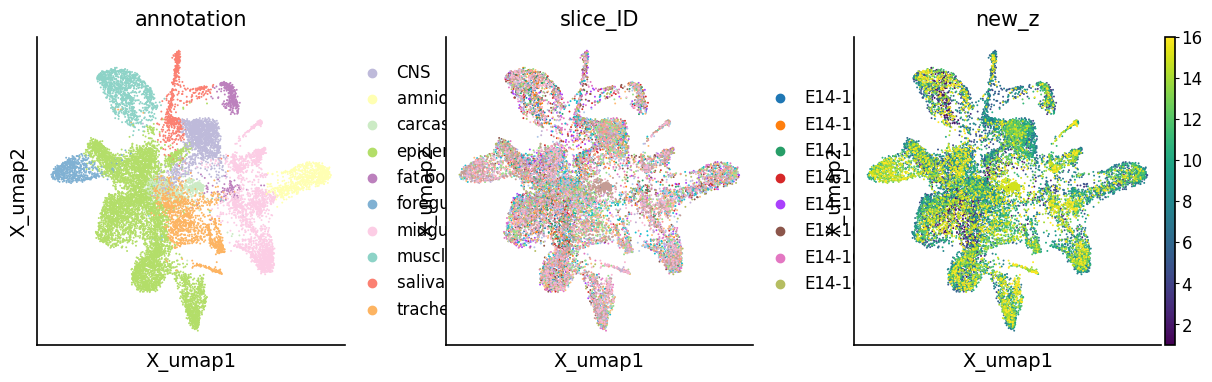

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


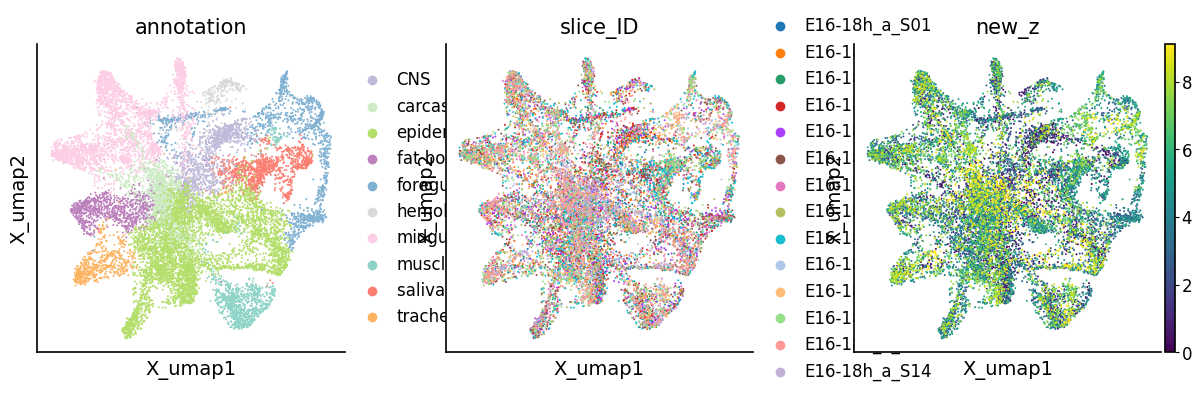

In [83]:
sc.pl.embedding(adata1, color=["annotation", "slice_ID", "new_z"], basis="X_umap")
sc.pl.embedding(adata2, color=["annotation", "slice_ID", "new_z"], basis="X_umap")

In [84]:
genes1 = set(adata1.var_names[adata1.var.highly_variable].values)
genes2 = set(adata2.var_names[adata2.var.highly_variable].values)
genes = list(genes1.intersection(genes2))
len(genes)

5791

(29929, 5791)


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


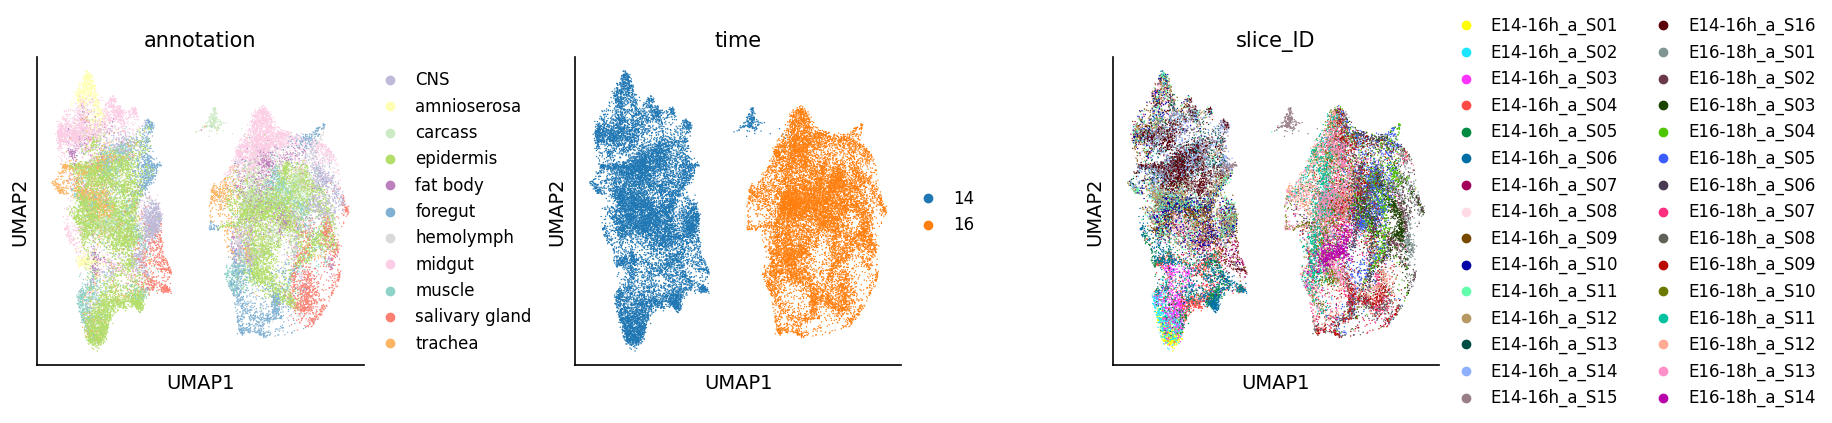

In [85]:
# sc.pp.pca(adata1)
# sc.pp.pca(adata2)

adata = ad.concat([adata1[:,genes], adata2[:,genes]], label="time", keys=[14, 16])
print(adata.shape)
sc.pp.pca(adata)
# sc.external.pp.scanorama_integrate(adata, "time")
# adata.obsm["X_umap_old"] = adata.obsm["X_umap"] 
# sc.pp.neighbors(adata, use_rep="X_scanorama")
# sc.tl.umap(adata)
adata.uns["annotation_colors"] = [colors[i] for i in adata.obs.annotation.cat.categories]

# sc.pp.neighbors(adata, use_rep="X_scanorama")
adata.obsm["X_umap_original"] = adata.obsm["X_umap"].copy()
sc.pp.neighbors(adata, use_rep="X_pca")
sc.tl.umap(adata)

sc.pl.umap(adata, color=["annotation","time","slice_ID"], wspace=0.5)


In [89]:
# sc.pp.subsample(adata, fraction=0.1)
ap = mt.problems.spatiotemporal.SpatioTemporalProblem(adata)
ap = ap.prepare(time_key="time", spatial_key="spatial", joint_attr={"attr":"obsm","key":"X_pca"})

INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   


In [90]:
ap = ap.solve(cost="cosine", alpha=0.3, epsilon=5e-2, threshold=1e-4, max_iterations=100, tau_a=0.990, tau_b=0.990, linear_solver_kwargs={"momentum":acceleration.Momentum(value=1., start=25)})

INFO     Solving `1` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(15295, 14634)].                                


In [91]:
ap.solutions[(14,16)].transport_matrix

Array([[1.7947410e-29, 1.2053380e-27, 3.8336859e-26, ..., 2.2340134e-25,
        1.7526629e-23, 2.3203592e-24],
       [2.2436046e-32, 3.5967770e-32, 7.4724170e-28, ..., 4.5527238e-24,
        3.1869932e-17, 1.0778101e-21],
       [2.0550339e-32, 1.7023634e-33, 3.4935900e-29, ..., 6.3871228e-24,
        6.1659313e-18, 5.2393814e-21],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8708149e-12,
        3.3358418e-16, 1.3509067e-11],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5612113e-18,
        3.8622942e-19, 6.1287823e-19],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.1200643e-13,
        5.5111677e-14, 2.0070224e-18]], dtype=float32)

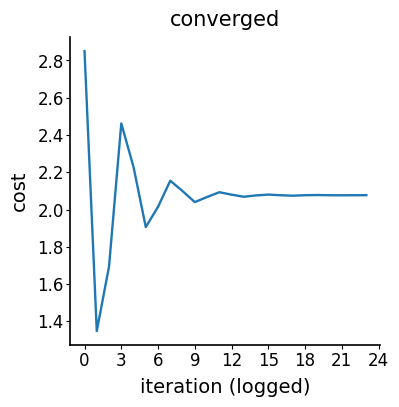

In [92]:
ap.solutions[(14,16)].plot_costs()

In [93]:
keys = list(ap.problems.keys())
keys[0]

(14, 16)

In [94]:
for source, target in keys:
    ap.cell_transition(
        source=source,
        target=target,
        source_groups="annotation",
        target_groups="annotation",
        key_added=f"{source}_{target}_cell_transition",
        batch_size=8,
    )

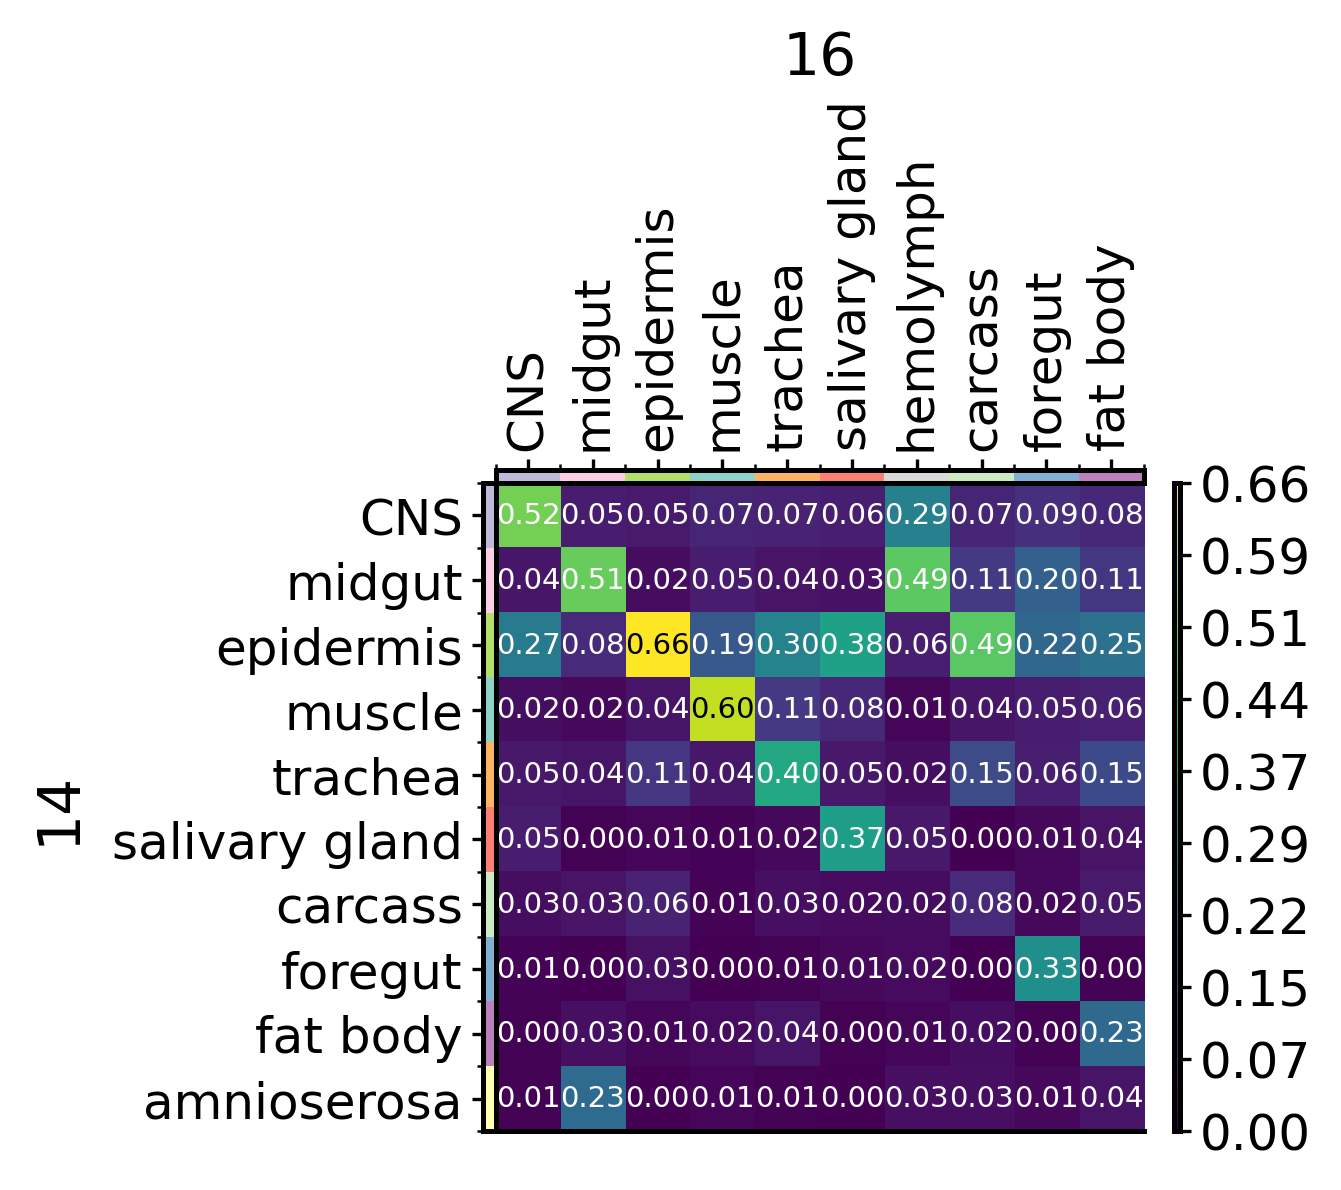

In [108]:
fig, ax = plt.subplots(1,1,figsize=(3, 3),dpi=300,)

for source, target in keys:
    mt.plotting.cell_transition(
        ap,
        key=f"{source}_{target}_cell_transition",
        ax=ax,
        # kwargs=dict(title="Cell transition from E14-16 to E16-18",)
    )


In [97]:
ap.push(source=14, target=16, key_added = "mass_push")
ap.pull(source=14, target=16, key_added = "mass_pull")
ap.push(source=14, target=16, data="annotation", key_added = "annotation_push")
ap.pull(source=14, target=16, data="annotation", key_added = "annotation_pull")

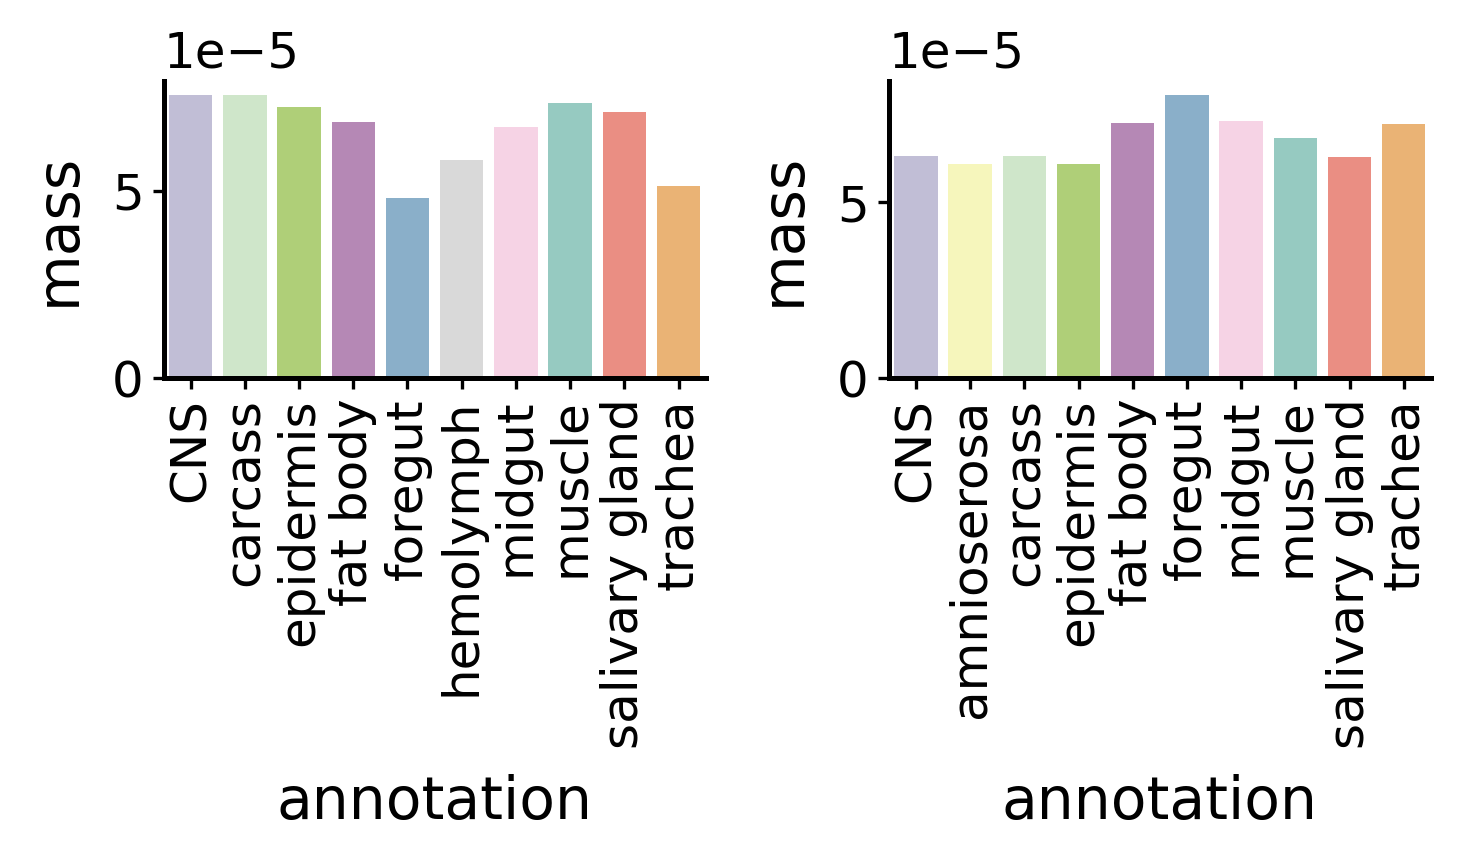

In [98]:
fig, ax = plt.subplots(1,2,figsize=(5,3), dpi=300)


mass = adata[adata.obs.time==16].obs[["mass_push", "annotation"]].groupby("annotation").mean()["mass_push"]# / counts.values
marginal_df = mass.reset_index()
marginal_df.columns=["annotation", "mass"]
g = sns.barplot(marginal_df, x="annotation", y="mass", palette=adata2.uns["annotation_colors"],ax=ax[0])
g.tick_params(axis='x', rotation=90)

mass = adata[adata.obs.time==14].obs[["mass_pull", "annotation"]].groupby("annotation").mean()["mass_pull"]# / counts.values
marginal_df = mass.reset_index()
marginal_df.columns=["annotation", "mass"]
g = sns.barplot(marginal_df, x="annotation", y="mass", palette=adata1.uns["annotation_colors"],ax=ax[1])
g.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [33]:
alltfs = pd.read_csv("./tf.txt", header=None)
alltfs.columns=["TF"]
alltfs

TF
0     Abd-B
1      Adf1
2      Aef1
3       Cf2
4     Dlip3
..      ...
836   XRCC1
837     yps
838  Zasp52
839    zfh1
840    zfh2

[841 rows x 1 columns]

Text(0.5, 1.0, 'CNS top 20 driver genes')

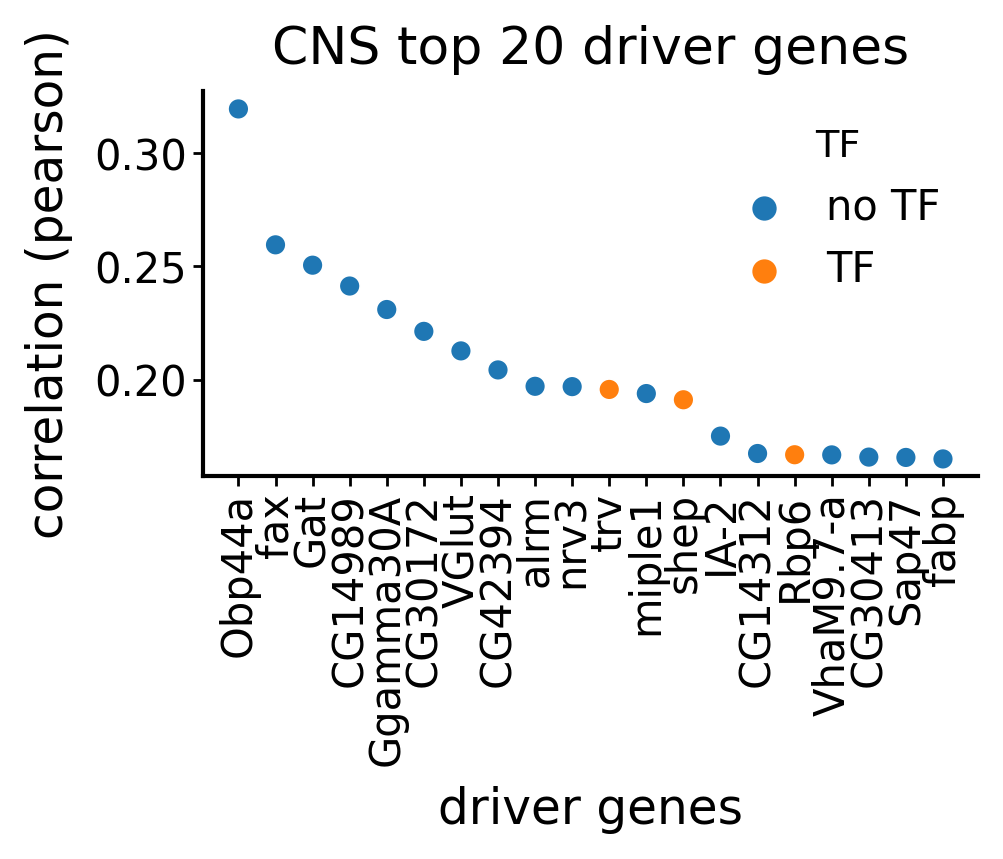

In [113]:
ap.pull(source=14, target=16, data="annotation", subset="CNS",key_added = "CNS_pull")
feature_corr_pull = ap.compute_feature_correlation(obs_key="CNS_pull", annotation={"time":[14,16] })
feature_corr_pull = feature_corr_pull.head(20).reset_index().rename(columns={"index":"gene"})
feature_corr_pull["TF"] = ["TF" if i in alltfs.TF.values else "no TF" for i in feature_corr_pull.gene.values]

fig, ax = plt.subplots(1,1,figsize=(4,2), dpi=250)
sns.scatterplot(feature_corr_pull, x="gene", y="CNS_pull_corr", hue="TF", ax=ax).tick_params(axis='x', rotation=90)
plt.xlabel('driver genes')
plt.ylabel('correlation (pearson)')
plt.title('CNS top 20 driver genes')
# plt.tight_layout()

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 1000x500 with 0 Axes>

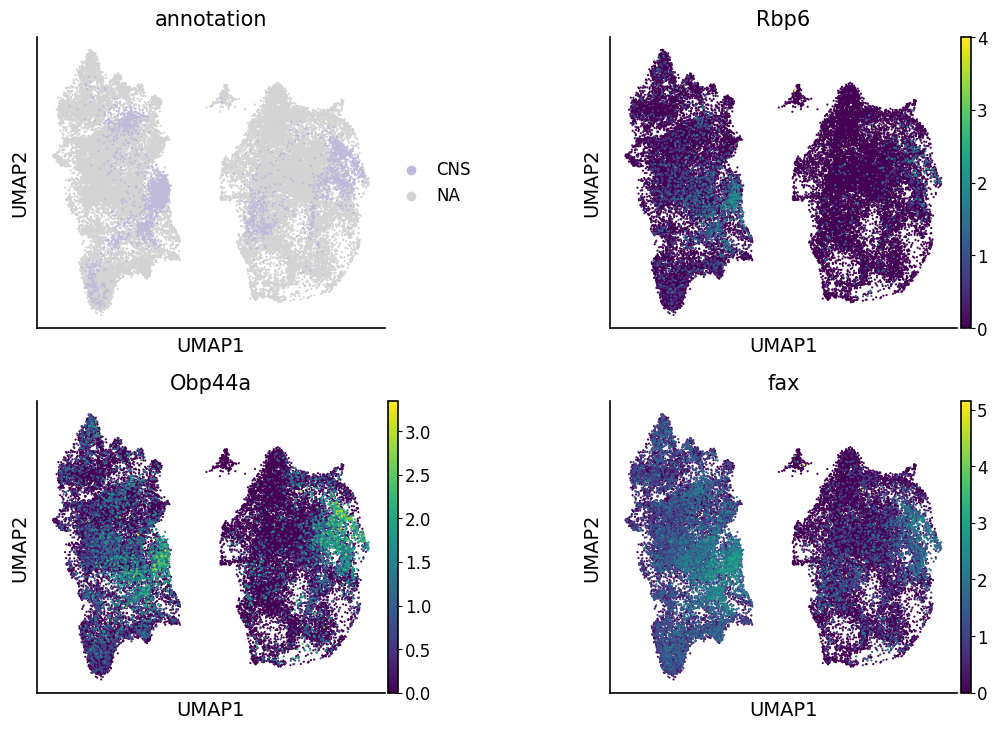

In [115]:
# fig, ax = plt.subplots(1,1,figsize=(4,2), dpi=250)
plt.figure(figsize=(4,2), dpi=250)
sc.pl.umap(adata, color=["annotation","Rbp6","Obp44a", "fax"],groups="CNS", wspace=0.5, ncols=2, s=10)

Text(0.5, 1.0, 'Muscle top 30 driver genes')

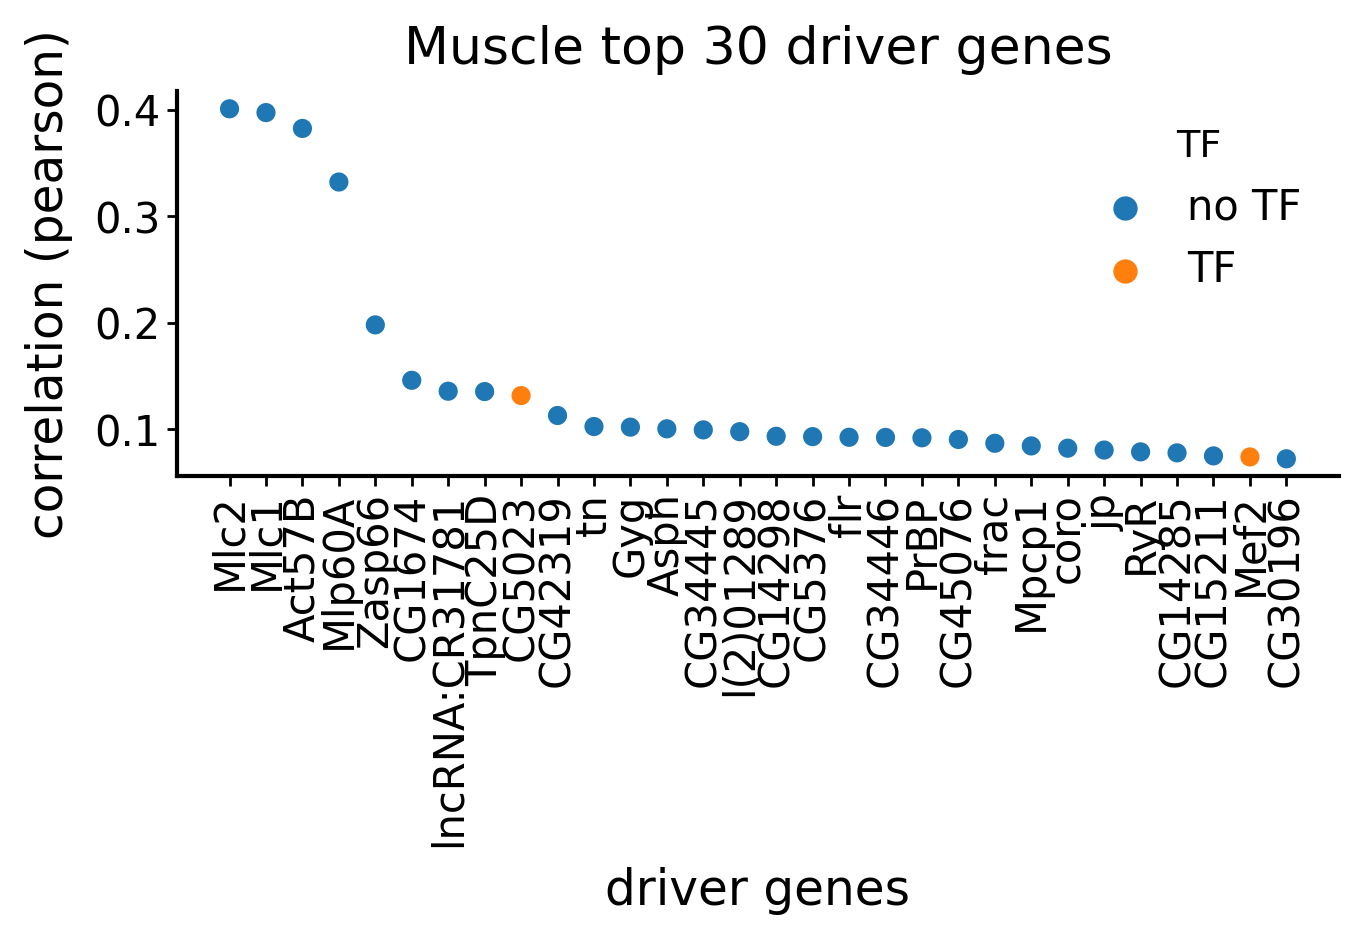

In [114]:
ap.pull(source=14, target=16, data="annotation", subset="muscle", key_added = "muscle_pull")
feature_corr_pull = ap.compute_feature_correlation(obs_key="muscle_pull", annotation={"time":[14,16] })
feature_corr_pull = feature_corr_pull.head(30).reset_index().rename(columns={"index":"gene"})
feature_corr_pull["TF"] = ["TF" if i in alltfs.TF.values else "no TF" for i in feature_corr_pull.gene.values]

fig, ax = plt.subplots(1,1,figsize=(6,2), dpi=250)
sns.scatterplot(feature_corr_pull, x="gene", y="muscle_pull_corr", hue="TF", ax=ax).tick_params(axis='x', rotation=90)
plt.xlabel('driver genes')
plt.ylabel('correlation (pearson)')
plt.title('Muscle top 30 driver genes')
# plt.tight_layout()

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 1000x500 with 0 Axes>

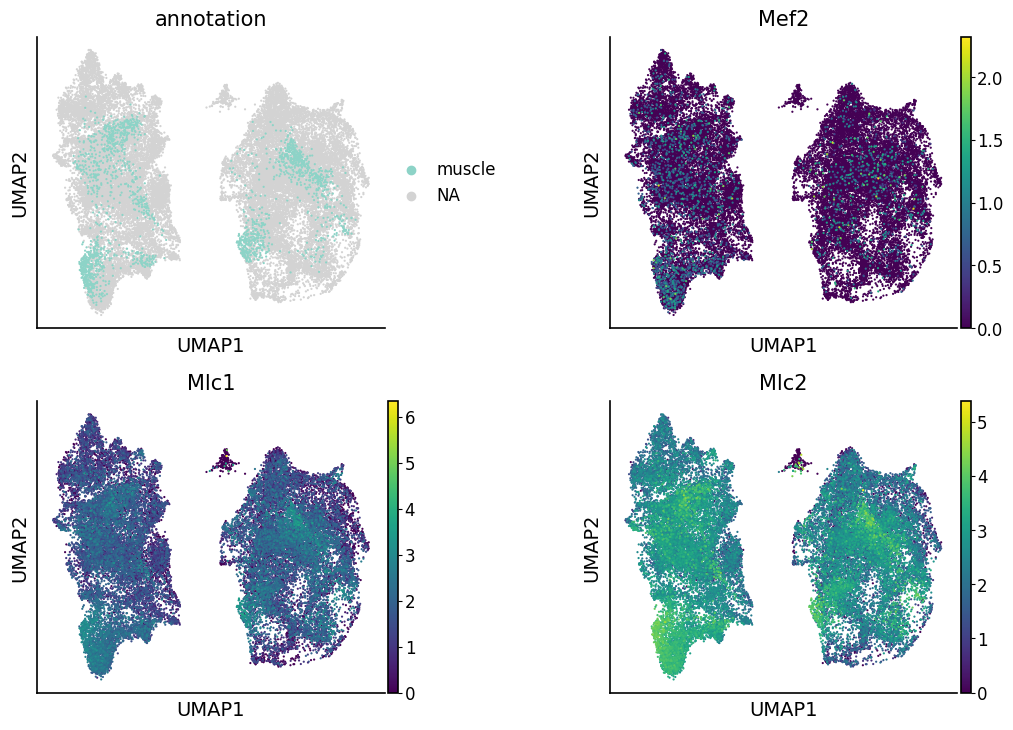

In [130]:
# fig, ax = plt.subplots(1,1,figsize=(4,2), dpi=250)
plt.figure(figsize=(4,2), dpi=250)
sc.pl.umap(adata, color=["annotation","Mef2","Mlc1", "Mlc2"],groups="muscle", wspace=0.5, ncols=2, s=10)
# adata.obsm["spatial_shifted"] = adata.obsm["spatial"].copy()
# adata.obsm["spatial_shifted"][adata.obs.time==16] +=20
# sc.pl.embedding(
#     adata,
#     basis="spatial_shifted",
#     projection="3d",
#     color=["annotation","Mef2","Mlc1", "Mlc2"],groups="muscle",s=10
# )